In [2]:
#import ML4PS as ml
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import os

%load_ext autoreload
%autoreload 2

import sys; sys.path.insert(0, '..')
import ML4PS as ml

# Choose dataset

In [6]:
data_dir = '../data/data_json/case14'

# Defining a series of normalizing functions

The features contained in power systems objects may have very different orders of magnitude and display complex distributions with possibly multiple modes. For this reason, it is very important to build a series of functions that can convert those atypical distributions into something that looks more like a uniform law between $-1$ and $1$.

This normalization process is done by computing a piecewise linear approximation of the cumulative distribution function of each required feature. This estimation is performed by considering a subset of the trainset. This estimation does not need to be perfect, so it seems reasonable to estimate it over a reasonably small amount of samples (see option *amount_of_samples*).

In [7]:
normalizer = ml.Normalizer(data_dir = data_dir, backend_name = 'pandapower')
normalizer.save('normalizer.pkl')

Loading all the dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.45it/s]


# Defining an interface

In order to have our neural network learn, we have to pass it multiple batches of instances of power grids. The interface has three iterators (train, val and test) that can iterate over the whole dataset defined in *data_dir*, and return inputs $a$ and $x$ that will be read by the neural network, and a series of pypowsybl networks instances.

As some people may be interested in dealing with time series, we have included the possibility of considering rolling windows. The attribute *series_length* defines the time coherence of time series, while *time_window* defines the size of the time windows that the iterator should retrieve. The different snapshots of a time windows are aggregated by concatenating their respective features. By default, we consider that we are not interested in time series.

In [13]:
interface = ml.Interface(data_dir = data_dir,
    backend_name = 'pandapower', batch_size = 10)

In the following we propose to show what our data looks like. Notice that $a$ and $x$ are nested dictionnaries, whose values have a shape [n_batch, n_obj, time_window], where n_obj is the amount of objects of the considered class. $a$ contains addresses (integers), while $x$ contains features (float).

In [19]:
a, x, nets = next(iter(interface.train))
print("keys in a :{}".format(list(a.keys())))
print("keys in a['gen'] :{}".format(list(a['gen'].keys())))
print("values in a['gen']['name'] :{}".format(a['gen']['name']))
print("")
print("keys in x :{}".format(list(x.keys())))
print("keys in x['gen'] :{}".format(list(x['gen'].keys())))
print("values in x['gen']['p_mw'] :{}".format(x['gen']['p_mw']))

keys in a :['bus', 'load', 'gen', 'shunt', 'ext_grid', 'line', 'trafo', 'poly_cost']
keys in a['gen'] :['bus', 'name']
values in a['gen']['name'] :[[[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]

 [[15]
  [16]
  [17]
  [18]]]

keys in x :['bus', 'load', 'gen', 'shunt', 'ext_grid', 'line', 'trafo', 'poly_cost']
keys in x['gen'] :['controllable', 'in_service', 'p_mw', 'scaling', 'sn_mva', 'vm_pu', 'slack', 'max_p_mw', 'min_p_mw', 'max_q_mvar', 'min_q_mvar', 'slack_weight', 'res_p_mw', 'res_q_mvar', 'res_va_degree', 'res_vm_pu']
values in x['gen']['p_mw'] :[[[28.33821608]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[19.99069573]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[26.83072153]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[19.32011672]
  [ 0

In [27]:
nets[0][0].line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630
5,186.299339,1.0,2,0.0,True,1.0,42.339020,100.0,None,1,12.212573,None,3,ol,31.170217
6,0.000000,1.0,3,0.0,True,1.0,42.339020,100.0,None,1,2.433038,None,4,ol,7.674548
7,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000041,None,10,ol,0.000086
8,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000053,None,11,ol,0.000111
9,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000029,None,12,ol,0.000056


In [32]:
x['load']['p_mw']

array([[[ 15.82565663],
        [ 52.29657835],
        [ 12.27618268],
        [  2.07853084],
        [  7.23274162],
        [ 12.98130096],
        [  2.24486257],
        [  0.99790316],
        [  3.95254449],
        [  6.05094569],
        [ 10.25390598]],

       [[ 14.09151505],
        [ 42.71411174],
        [ 22.15519229],
        [  3.30548804],
        [  2.69305278],
        [  9.46651833],
        [  5.16682478],
        [  2.25402439],
        [  3.54568003],
        [  3.9132717 ],
        [ 10.32675323]],

       [[ 17.39880356],
        [ 76.59363541],
        [ 38.71933384],
        [  3.49012362],
        [  8.87247012],
        [ 29.05317943],
        [  3.32757257],
        [  3.4666945 ],
        [  3.0879028 ],
        [  5.37766179],
        [ 12.44626072]],

       [[ 13.63816668],
        [ 32.11613079],
        [ 14.66095868],
        [  4.13999288],
        [  7.64386391],
        [ 12.25210284],
        [  4.92638481],
        [  1.38513859],
        [ 

In [33]:
x_norm = normalizer(x)

In [34]:
x_norm['load']['p_mw']

array([[[ 0.41319926],
        [ 0.86564262],
        [ 0.26190077],
        [-0.91491096],
        [-0.14990964],
        [ 0.29588008],
        [-0.88841138],
        [-1.00382769],
        [-0.62889367],
        [-0.31832635],
        [ 0.1254308 ]],

       [[ 0.34001286],
        [ 0.81025789],
        [ 0.60878047],
        [-0.73474687],
        [-0.8296626 ],
        [ 0.05630127],
        [-0.43979885],
        [-0.88757891],
        [-0.70210819],
        [-0.63550201],
        [ 0.12800796]],

       [[ 0.4711457 ],
        [ 0.93994418],
        [ 0.78644627],
        [-0.71100454],
        [ 0.00980433],
        [ 0.69414886],
        [-0.73212697],
        [-0.71541054],
        [-0.77952745],
        [-0.41071125],
        [ 0.26753284]],

       [[ 0.32286697],
        [ 0.7300015 ],
        [ 0.36129438],
        [-0.58794234],
        [-0.10177924],
        [ 0.26110337],
        [-0.47838977],
        [-0.98561316],
        [-0.59258809],
        [-0.63734643],
     

In [36]:
raw_data = np.reshape(x['load']['p_mw'], [-1])
norm_data = np.reshape(x_norm['load']['p_mw'], [-1])

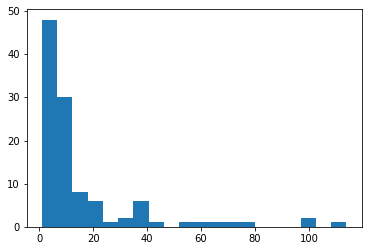

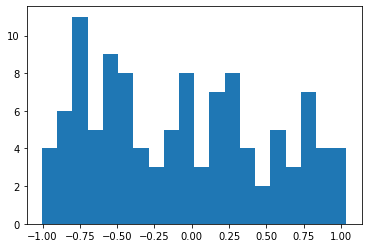

In [41]:
plt.hist(raw_data, bins=20)
plt.show()

plt.hist(norm_data, bins=20)
plt.show()